# Personal Project - Loaning Approval Prediction




# Loan Dataset

- main source dataset: https://www.kaggle.com/datasets/wordsforthewise/lending-club
- Dataset glosary: https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv
- Dataset that used in this project: https://www.kaggle.com/datasets/abrahamanderson/lending-club-loans

## About dataset

This dataset is from a company name Lending Club. Lending Club is a peer-to-peer Lending company based in the US. They match people looking to invest money with people looking to borrow money. When investors invest their money through Lending Club, this money is passed onto borrowers, and when borrowers pay their loans back, the capital plus the interest passes on back to the investors. It is a win for everybody as they can get typically lower loan rates and higher investor returns. The Lending Club dataset contains complete loan data for all loans issued through the 2007-2016. 

# Business Undrerstanding

## Problem
Untuk approve credit card butuh waktu lama jika dilihat satu-satu. Karenanya perlu klasifikasi yang dapat dengan efisien menentukan apakah seseorang eligible untuk mendapatkan credit/pinjaman.

## Goals
- Liat nasabah mereka ada berapa tahun ini, dan tahun sebelumnya apakah meningkat (berapa persen peningkatan)
- rata-rata pinjaman nya berapa??
- nah dari situ, karena ada nasabah yang menigkat (kalo meingkat ya, wkwk) kita butuh cara supaya kita tahu mana loanaer yang eligible dan tidak
- sehingga goals dari projek ini adalah Nilai "True Positive" nya besar dan Nilai "False Positive kecil"

Meningkatkan jumlah 'good loaner' yang akan mendaftar kredit

## Objective
Membuat klasifikasi nasabah mana yang cenderung menjadi good atau bad loaner, sehingga akan menghindari pihak bank dari kerugian.

## Business Metrics
- Conversion rate. *% potential lead conversion
(the higher the potential conversion lead, the more likely to know if it's a good loaner or not)




# Data Understanding

## Import Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [4]:
data_lending_club = '/content/drive/MyDrive/1.VIX_rakamin_DS_IDX/Personal_Project_Loaning_Approval/dataset/lending_club_loan_two.csv'
df = pd.read_csv(data_lending_club)

## Exploring Data (Descriptive Statistics)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
df.shape

(396030, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Data Explanation

- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- term: The number of payments on the loan. Values are in months and can be either 36 or 60.
- int_rate: Interest Rate on the loan
- installment: The monthly payment owed by the borrower if the loan originates.
- grade: LC assigned loan grade
- sub_grade: LC assigned loan subgrade taxliens Number of tax liens
- emp_title: The job title supplied by the Borrower when applying for the loan    
- emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- home_ownership: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.    
- annual_inc: The self-reported annual income provided by the borrower during registration.
- verification_status:  Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified 
- issue_d
- loan_status          
- purpose: A category provided by the borrower for the loan request.      
- title: The loan title provided by the borrower
- dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. 
- earliest_cr_line: The date the borrower's earliest reported credit line was opened  
- open_acc: The number of open credit lines in the borrower's credit file.
- pub_rec: Number of derogatory public records
- revol_bal: Total credit revolving balance 
- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. 
- total_acc: The total number of credit lines currently in the borrower's credit file
- initial_list_status: The initial listing status of the loan. Possible values are – W, F
- application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
- mort_acc: Number of mortgage accounts.
- pub_rec_bankruptcies: Number of public record bankruptcies
- address

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [ ]:
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

In [ ]:
df['sub_grade'].nunique()

35

In [ ]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
df['emp_title'].nunique()

173105

In [ ]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [ ]:
df['title'].nunique()

48817

In [ ]:
df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [ ]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [ ]:
# Numeric colomn
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.astype('object').describe()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.0,396030,396030.00,396030.00,396030,396030,373103,377729,396030,396030.0,396030,396030,396030,396030,394275,396030.0,396030,396030.0,396030.0,396030.0,395754.0,396030.0,396030,396030,358235.0,395495.0,396030
unique,1397.0,2,566.00,55706.00,7,35,173105,11,6,27197.0,3,115,2,14,48817,4262.0,684,61.0,20.0,55622.0,1226.0,118.0,2,3,33.0,9.0,393700
top,10000.0,36 months,10.99,327.34,B,B3,Teacher,10+ years,MORTGAGE,60000.0,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,0.0,Oct-2000,9.0,0.0,0.0,0.0,21.0,f,INDIVIDUAL,0.0,0.0,USCGC Smith\nFPO AE 70466
freq,27668.0,302005,12411.00,968.00,116018,26655,4389,126041,198348,15313.0,139563,14846,318357,234507,152472,313.0,3017,36779.0,338272.0,2128.0,2213.0,14280.0,238066,395319,139777.0,350380.0,8


## Define Target Variable / Labeling

In [ ]:
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

This dataset already has 2 outcome for the target variable (Either yes or no).

## **Decision**

- There are some columns that have missing values:
  - emp_title, emp_lenght: can be treated using imputation (mode)
  - rev_util
  - pub_rec_bankruptcies, mort_acc: can be treated using imputation (mean / median)
  - title: we delete this columns. Too much unique values.

- For data types:
  - loan_amnt, int_rate, installment, annual_inc, dti, open_acc,	pub_rec,	revol_bal,	revol_util,	total_acc, mort_acc	pub_rec_bankruptcies: nothing's wrong with these columns.

  - term, change it to int (36 and 60)

  - grade, emp_length, verification_status, initial_status_list : nothing's wrong with it, we need to change it later using label encoding (in data perprocessing)

  - home_ownership, purpose, application_type : nothing's wrong with it, we need to change it later using one hot encoding (in data perprocessing)

  - The emp_title has araounf 173105 unique values. I think it's an importand column, we could make the same type of job to one title

  - issue_id: We can keep issue ID, create month and year columns (For EDA), then we change the value to months (to year...), then delete the year and month columns

  - earliest_cr_line: Change the value to months (to year...)

  - Address, we can take the state and do one hot later.

- Delete some columns:
  - sub_grade columns has around 35 unique values. I think it's too much for the modelling, if we're using one hot encoding, and we already have grade columns that has the same meaning. Consider to delete it.

  - title has around 48817 unique values, but we already have purpose column, that have the same meaning. So, we could consider delete this column.

## Create Business Metrics

In [6]:
# get month and year
df['year'] = pd.DatetimeIndex(df['issue_d']).year
df['month'] = pd.DatetimeIndex(df['issue_d']).month

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,year,month
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",2015,1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",2015,1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",2015,1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",2014,11
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",2013,4


In [8]:
total_customer_yearly = df.groupby(['year']).size().reset_index(name='counts')
total_customer_yearly

,year,counts
0,2007,195
1,2008,1240
2,2009,3826
3,2010,9258
4,2011,17435
5,2012,41202
6,2013,97662
7,2014,102860
8,2015,94264
9,2016,28088


In [10]:
# We want to see year on year growth of customer in this loan company
total_customer_yearly['yoy_growth_customer'] = total_customer_yearly['counts'].pct_change()
total_customer_yearly

,year,counts,yoy_growth_customer
0,2007,195,NaN
1,2008,1240,5.358974
2,2009,3826,2.085484
3,2010,9258,1.419760
4,2011,17435,0.883236
5,2012,41202,1.363178
6,2013,97662,1.370322
7,2014,102860,0.053224
8,2015,94264,-0.083570
9,2016,28088,-0.702028


# Data Cleaning

## Missing Value

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- Tidak terdapat missing value, terdapat beberapa data dengan value unknown. Namun, hal tersebut bukan termasuk missing value.

## Duplicate value

In [ ]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")

Duplicate Rows :


- Tidak ada data yang duplicate

## Data type

- Semua data type sudah benar, tidak ada yang perlu diubah

## Outliers

### Detect Outliers

In [ ]:
print(numericals)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


- Untuk deteksi dan treat data otlier dengan z-scores, harus pada data yang distribusi normal, selain itu pakai IQR

- Karena data kita hampir semuanya terdistribusi positive skew, maka akan lebih baik di treatment dengan IQR

<img src='https://editor.analyticsvidhya.com/uploads/440971.png'>


https://www.analyticsvidhya.com/blog/2022/08/dealing-with-outliers-using-the-z-score-method/

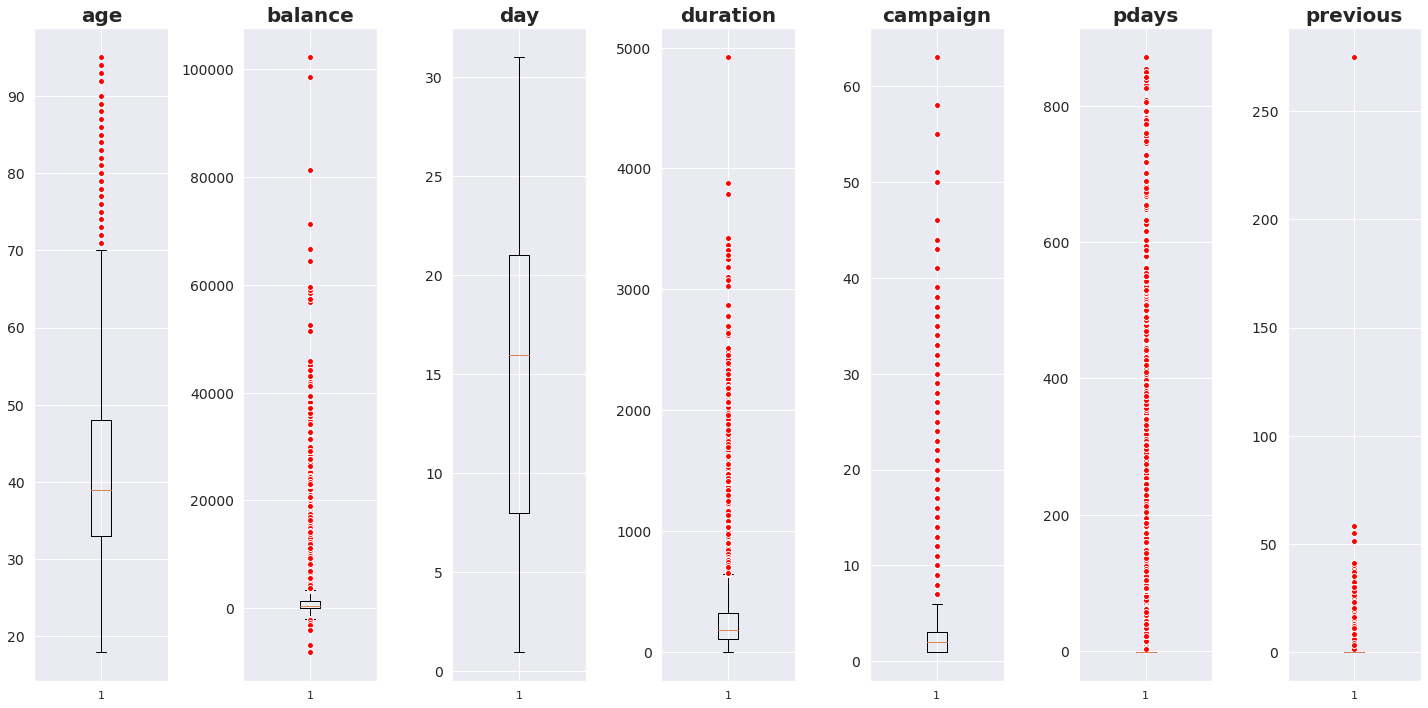

In [ ]:
#Creating subplot of each column with its own scale
try:
  red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(numericals), figsize=(20,10))

  for i, ax in enumerate(axs.flat):
      ax.boxplot(df[numericals].iloc[:,i], flierprops=red_circle)
      ax.set_title(df[numericals].columns[i], fontsize=20, fontweight='bold')
      ax.tick_params(axis='y', labelsize=14)
      
  plt.tight_layout()
except:
  print("Error")

- Untuk data outliers di age, balance, campaign dan pdays masih cukup aman, karena masih ada data yang berdekatan

- Ouliers pada duration dan previus cukup jauh gap nya, consider untuk di perhatikan kembali

### Handling Outliers

- Ouliers itu penyebabnya ada dua
  - error, seperti salah ketik, ada data yang salah, dll
  - special occasion, seperti umur 100 tahun. itu extreme tapi masih mungkin terjadi

- Untuk yang special occasion tidak perlu dihapus

- untuk yang error perlu dihapus

- Sehingga perlu diketahui, apakah datanya itu kira-kira mungkin terjadi atau tidak

# EDA

## Look at the data each columns (EDA univariate)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Numericals

In [ ]:
num_dtypes = ['int16', 'int32', 'int64', 'float', 'float16', 'float32', 'float64']

num_df = df.select_dtypes(include = num_dtypes)
numericals = num_df.columns
print(numericals)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [ ]:
# nanti disini describe lagi

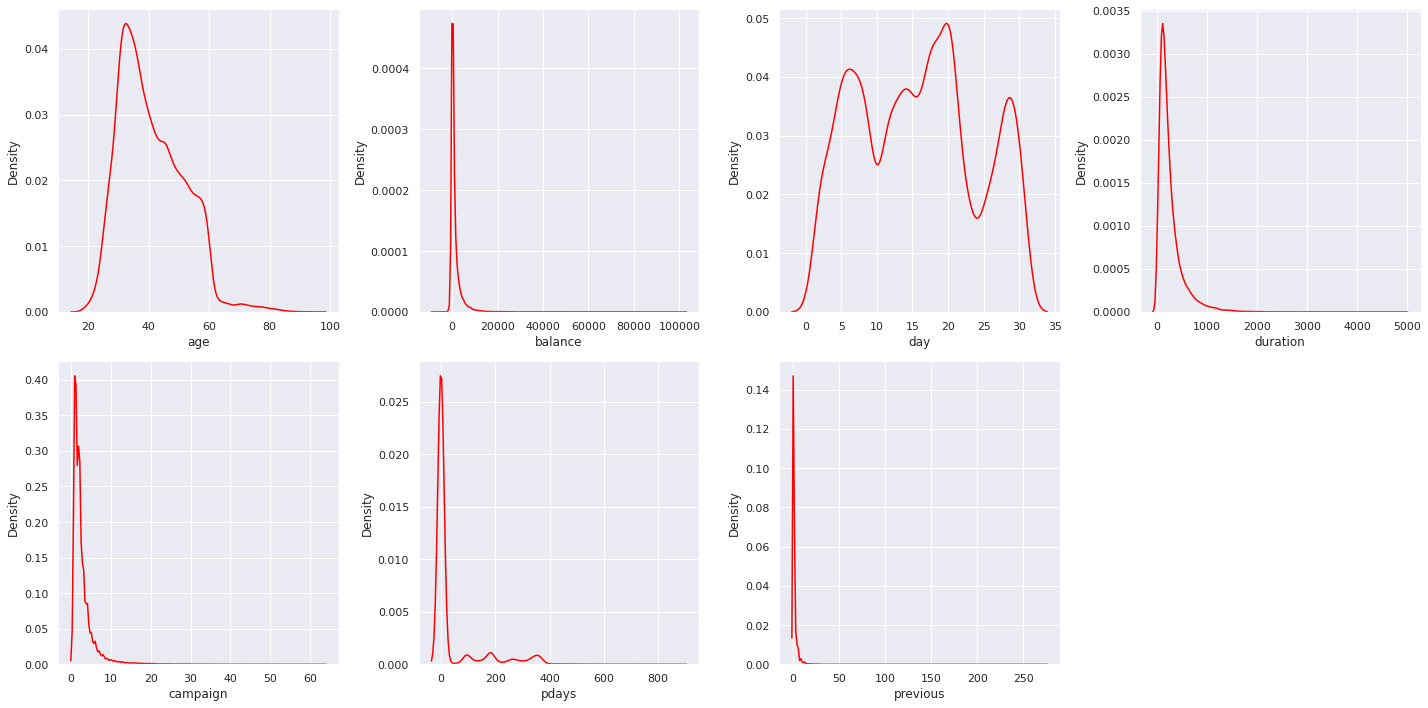

In [ ]:
# Distplot

features_num = numericals

plt.figure(figsize=(20,10))

for i in range(0, len(numericals)): 
  plt.subplot(2, 4, i+1) # 2x4 = 8 > len(numericals) = 7
  sns.kdeplot(x=df[features_num[i]], color = 'red')
  plt.xlabel(features_num[i])
  plt.tight_layout()
  

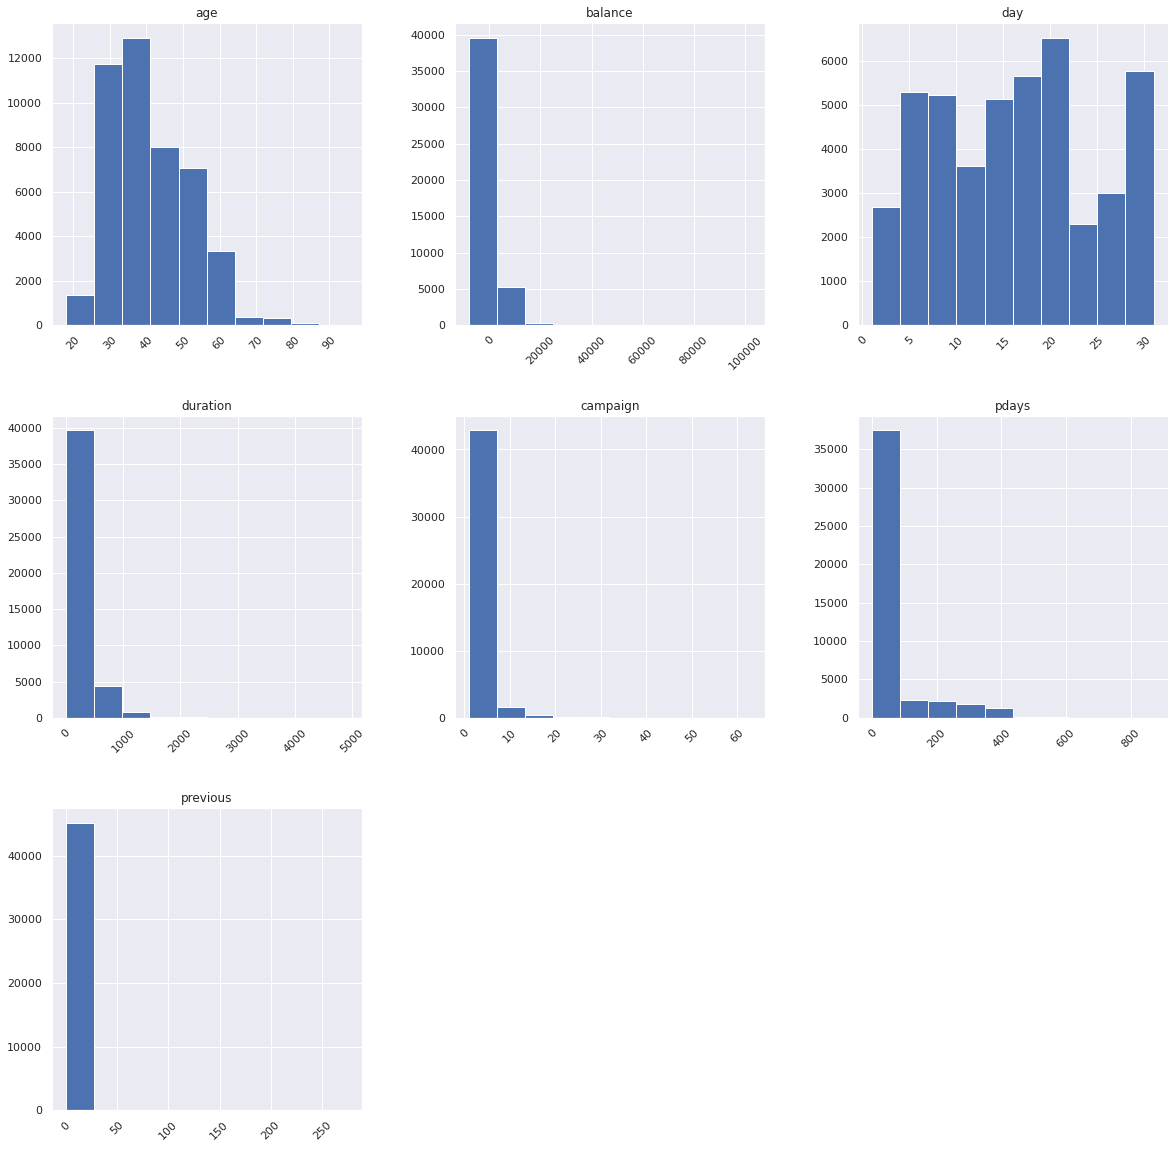

In [ ]:
# Histogram
df.hist(figsize=(20,20), xrot=45)
plt.show()

Jika kita lihat distribusi dari data-data numerik di atas, dapat dilihat hampir semua datanya positive skew / condong ke kiri, kecuali `day` yang distribusinya tidak merata.

### Categoricals

In [ ]:
cat_df = df.select_dtypes(exclude = num_dtypes)
categoricals = cat_df.columns
print(categoricals)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [ ]:
# create describe lagi

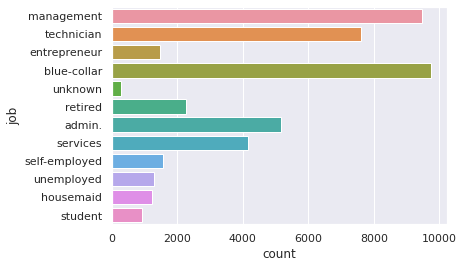

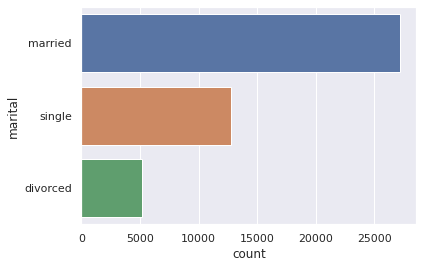

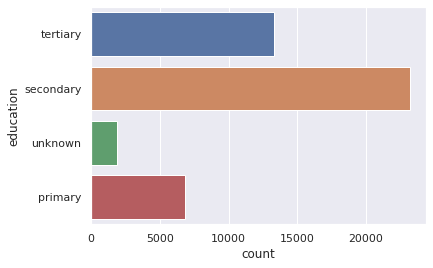

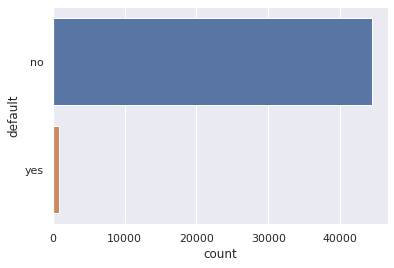

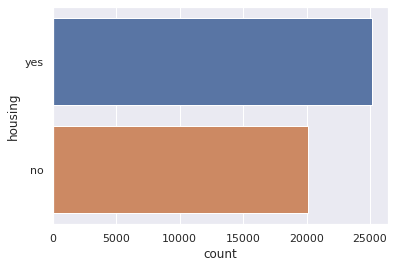

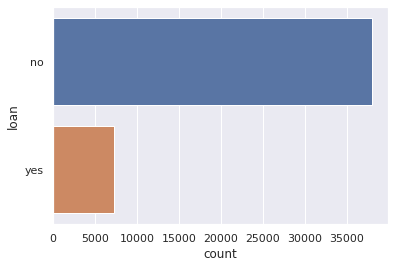

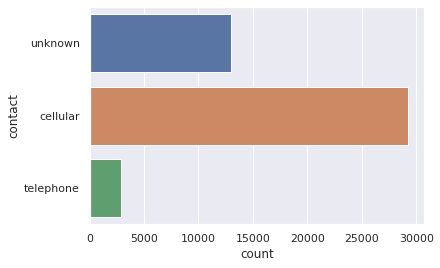

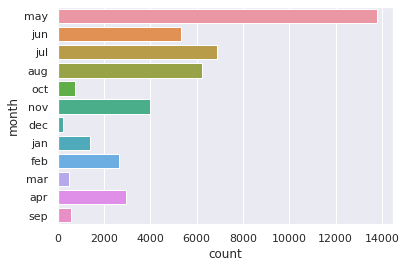

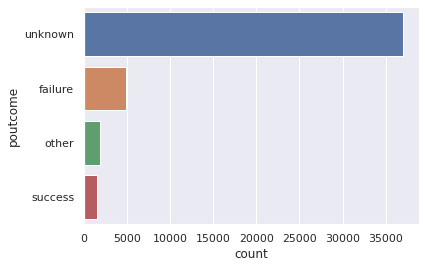

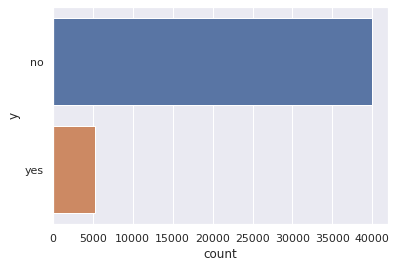

In [ ]:
# Bar Plot
    
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 16:
        sns.countplot(y=column, data=df)
        plt.show()

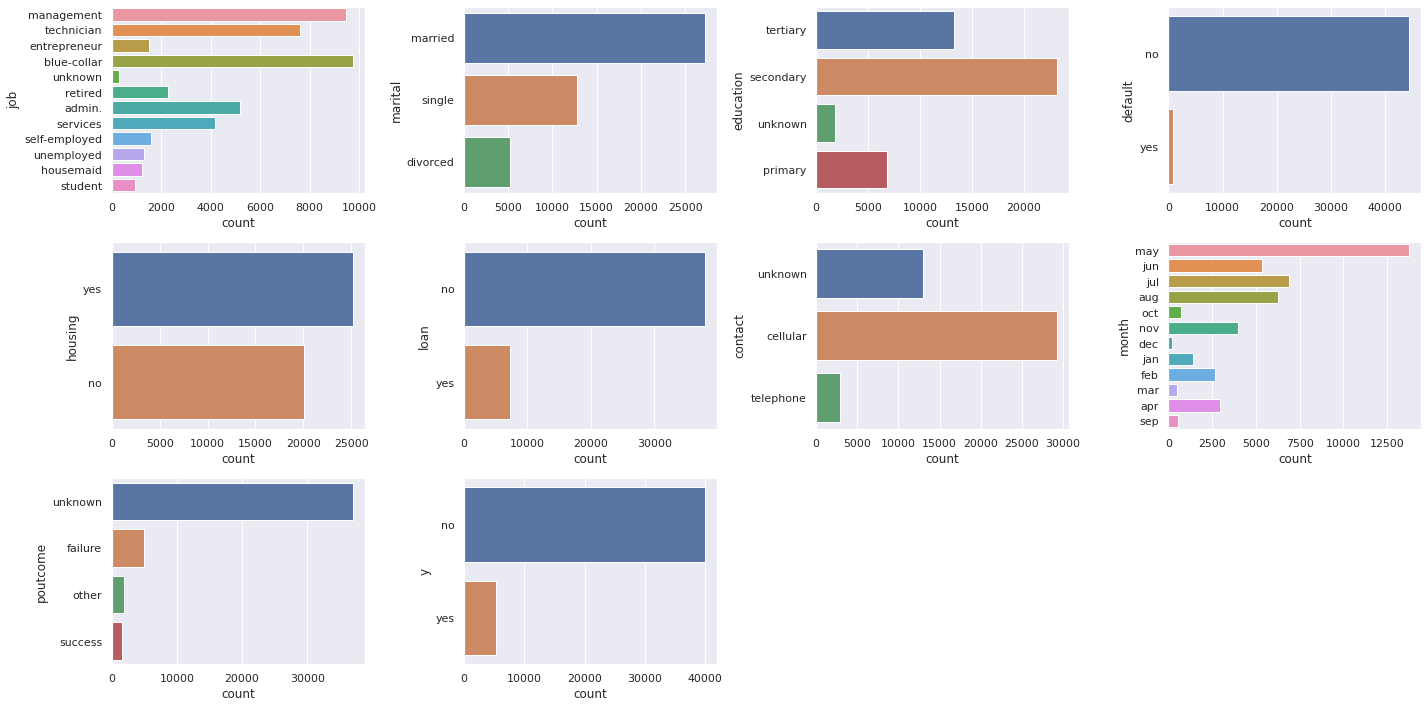

In [ ]:
features_cat = categoricals

plt.figure(figsize=(20,10))

if df[column].nunique() < 16:
  for i in range(0, len(categoricals)): 
    plt.subplot(3, 4, i+1) 
    sns.countplot(y=df[features_cat[i]])
    plt.tight_layout()

- Jika dilihat dari data-data kategorik diatas, persebaran datanya beragam, namun yang pasti pada variabel target cukup tidak balance, nantinya membutuhkan handling imbalance.
- Untuk data kategorikal semua value nya sudah clean, tidak ada yang perlu diubah / perbaiki
- Nantinya membutuhkan one hot encoding / label encoding untuk dimasukkan dalam permodelan
- Tidak ada kolum kategorik yang hanya memiliki satu data saja, jadi tidak ada yang perlu dihapus

## Bivariate

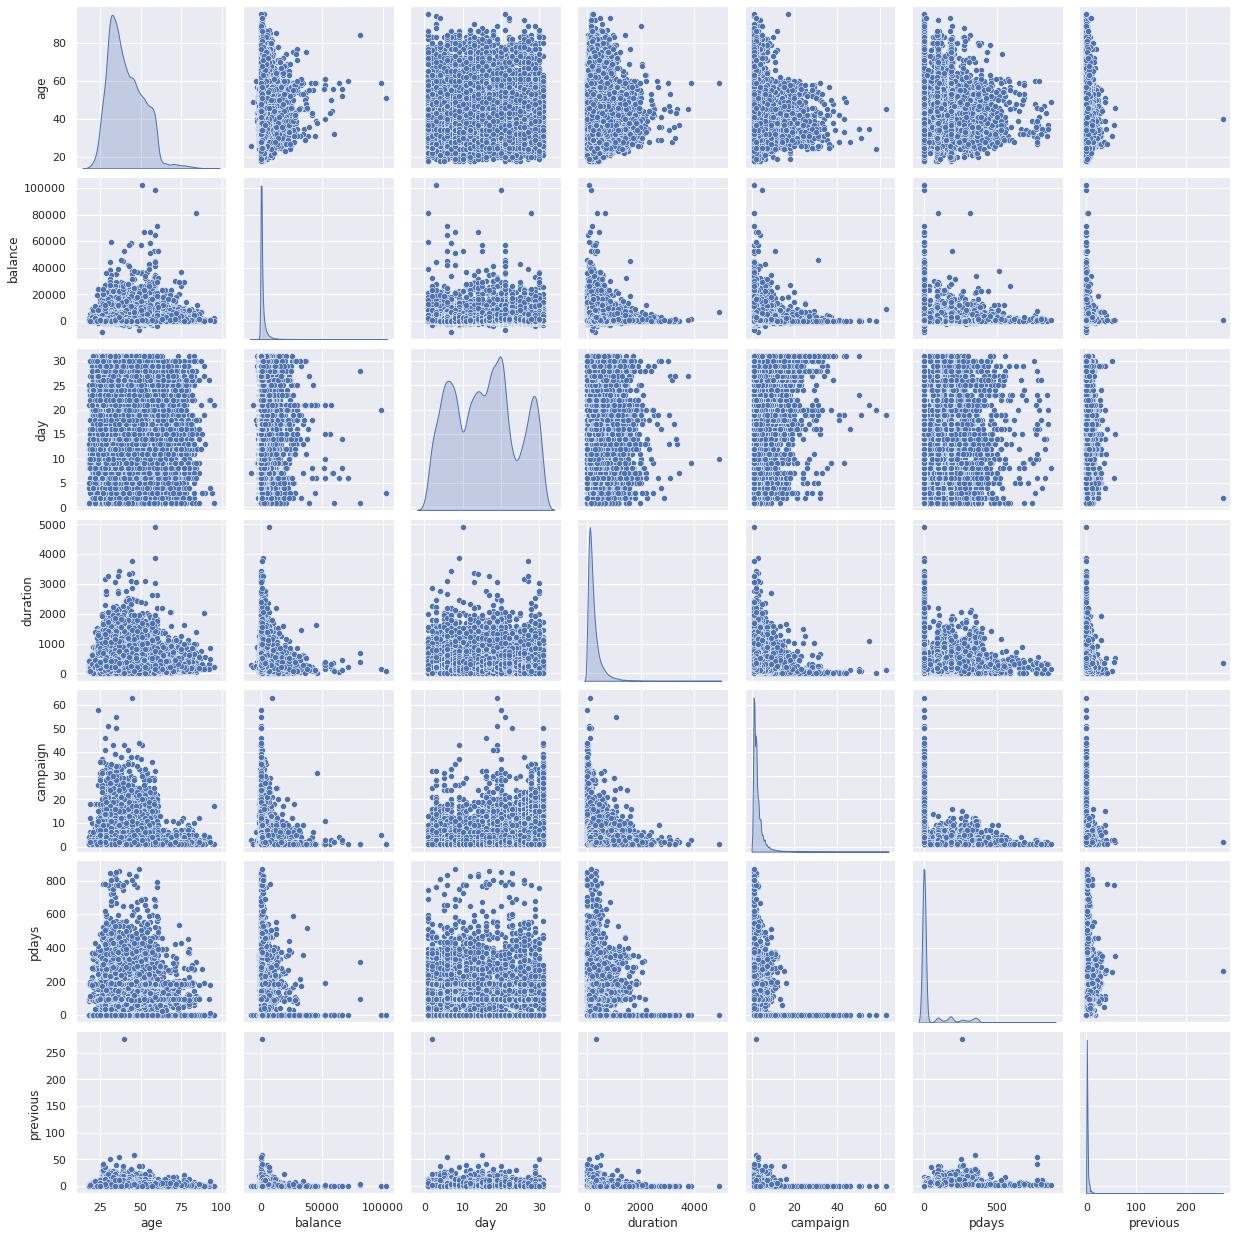

In [ ]:
# Numeric
sns.pairplot(df, diag_kind='kde')

- Berdasarkan grafik pairplot diatas tidak ada linearitas yang positive ataupun negative pada kolum-kolum numerik yang ada
- Terdapat outliers yang nantinya bisa di treatment

KeyboardInterrupt: ignored

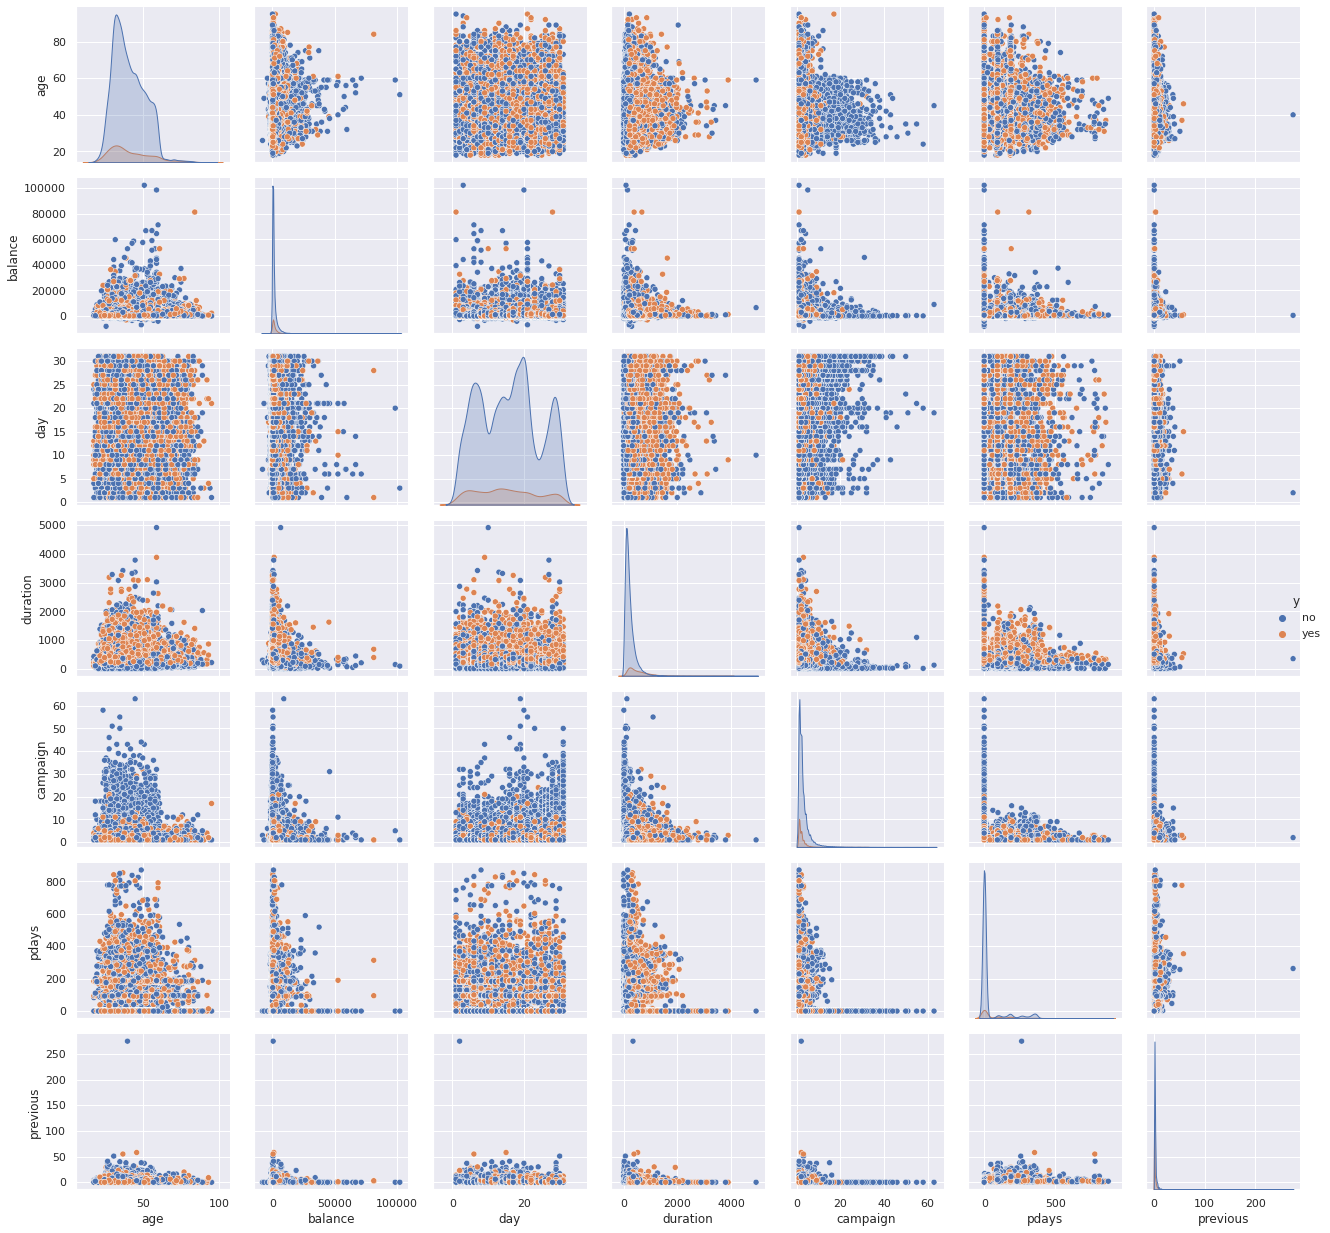

In [ ]:
# Numeric
sns.pairplot(df, diag_kind='kde', hue='y')

Jika dilihat dari pairplot nya, data antara yes dan no tidak terpisah secara signifikan terlihat. Sehingga untuk clustering tidak terlalu bagus.

## Correlation

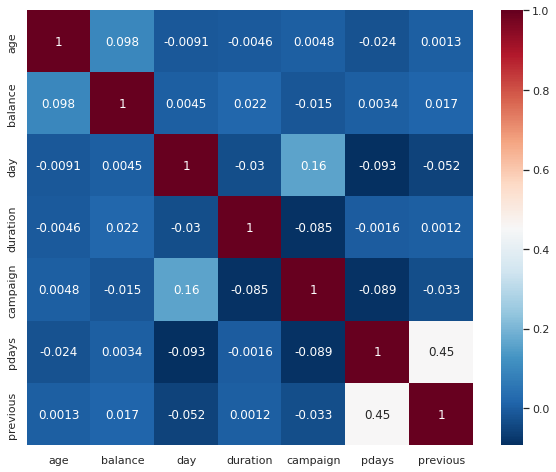

In [ ]:
# Heatmap
plt.figure(figsize=(10,8))
corrs = df.corr()
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

- Tidak ada data yang korelasinya > 0.7, sehingga tidak ada variable yang redundant

# Data Preparation / Preprocessing

## Feature Scaling

Standardization

- Karena hampir semua data numerikal tidak terdistribusi normal (positive skew), jadi pakai standardization. Untuk normalization dipakai scaling jika datanya sudah terdistribusi normal (Karena normalization tidak akan mengubah distribusi data).
- Dilakukan pada feature numerikal saja, feature kategorikal yang sudah di label encoding / one hot encoding tidak perlu
- Normalization dipakai jika datanya terdistribusi normal, dan ada banyak angka negatif yang harus jadi non negatif

In [ ]:
categorical_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]
print(categorical_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [ ]:
numerical_cols = [col for col in df.columns.tolist() if col not in categorical_cols + ['y']]
print(numerical_cols)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_num_scaled = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [ ]:
df_num_scaled.head()

,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194


In [ ]:
df_num_scaled.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,2.112250e-16,1.760208e-17,1.257292e-17,6.035001e-17,3.017500e-17,2.011667e-17,4.023334e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00,-1.779108e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01
25%,-7.473845e-01,-4.237719e-01,-9.380027e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01
50%,-1.823406e-01,-3.002800e-01,2.326031e-02,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01
75%,6.652252e-01,2.158743e-02,6.240497e-01,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01
max,5.091402e+00,3.309478e+01,1.825628e+00,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02


## Feature Encoding

- Feature Encoding adalah proses mengubah feature categorical menjadi feature numeric.

- Mengapa kita perlu feature encoding? Tak semua model/algoritma ML dapat menggunakan feature categorical.

In [ ]:
print(categorical_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [ ]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64


married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64


secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64


no     98.197341
yes     1.802659
Name: default, dtype: float64


yes    55.583818
no     44.416182
Name: housing, dtype: float64


no     83.977351
yes    16.022649
Name: loan, dtype: float64


cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: contact, dtype: float64


may    30.448342
jul    15.250713
aug    13.817434
jun    11.813497
nov     8.781049
apr     6.485147
feb     5.859194
jan     3

### Label Encoding

Label Encoding digunakan pada:
- Kolom kategorikal dengan jumlah distinct values = 2. E.g. Gender, respon ya/tidak, etc

- Kolom kategorikal dengan tipe ordinal (punya urutan). E.g.
tingkat pendidikan, intensitas (rendah/medium/tinggi),
socio-economic status (A/B/C/D), etc

- Sisanya pakai one-hot-encoding

- yang masuk kualifikasi label encoding: `education`, `default`, `housing`, `loan`, `y`

In [ ]:
# education
mapping_edu = {
  'unknown' : 0,
  'primary': 1,
  'secondary': 2,
  'tertiary' : 3
}

df['education'] = df['education'].map(mapping_edu)

In [ ]:
# default
mapping_edu = {
  'no' : 0,
  'yes': 1
}

df['default'] = df['default'].map(mapping_edu)

In [ ]:
# housing
mapping_edu = {
  'no' : 0,
  'yes': 1
}

df['housing'] = df['housing'].map(mapping_edu)

In [ ]:
# loan
mapping_edu = {
  'no' : 0,
  'yes': 1
}

df['loan'] = df['loan'].map(mapping_edu)

In [ ]:
# y
mapping_edu = {
  'no' : 0,
  'yes': 1
}

df['y'] = df['y'].map(mapping_edu)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,2,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  int64 
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(12), object(5)
memory usage: 5.9+ MB


### One Hot Encoding

- Lakukan pada kolom: `job`, `marital`, `contact`, `month`, `poutcome`

In [ ]:
# import sklearn.preprocessing as preprocessing

# # Label encoding using sklearn
# labelEnc = preprocessing.LabelEncoder()
# for x in df:
#   if df[x].dtypes=='object':
#     df[x] = labelEnc.fit_transform(df[x])

# new_target = labelEnc.fit_transform(targets)
# onehotEnc = preprocessing.OneHotEncoder()
# onehotEnc.fit(new_target.reshape(-1, 1))
# targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
# print("The original data")
# print(targets)
# print("The transform data using OneHotEncoder")
# print(targets_trans.toarray())

In [ ]:
categorical_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]
categorical_cols

['job', 'marital', 'contact', 'month', 'poutcome']

In [ ]:
onehot = pd.get_dummies(df[categorical_cols], drop_first=True)

- Ada dummy variable trap, sehingga satu kolom dari hasil one hot dummy variable setiap kolom asal di hapus satu; number of dummy variable column = n-1, dimana n adalah jumlah dummy variable column

In [ ]:
onehot.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
onehot.shape

(45211, 29)

dari 5 jenis kolom, menjadi 34 kolom, tapi tiap kolom dikurangi 1, menjadi 29 kolom

### Memasukkan hasil Feature scaling & Feature Encoding

In [ ]:
df_en = pd.concat([df_num_scaled, df[['education', 'default', 
                      'housing', 'loan']], onehot ,df[['y']]], axis=1)

In [ ]:
df_en.head()

,age,balance,day,duration,campaign,pdays,previous,education,default,housing,loan,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,2,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_en.describe()

,age,balance,day,duration,campaign,pdays,previous,education,default,housing,loan,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,2.112250e-16,1.760208e-17,1.257292e-17,6.035001e-17,3.017500e-17,2.011667e-17,4.023334e-17,2.060516,0.018027,0.555838,0.160226,0.215257,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370,0.601933,0.282896,0.064276,0.287983,0.138174,0.004733,0.058592,0.031032,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478,0.116985
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,0.778704,0.133049,0.496878,0.366820,0.411005,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559,0.489505,0.450411,0.245247,0.452828,0.345087,0.068637,0.234862,0.173407,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278,0.321406
min,-2.159994e+00,-3.081149e+00,-1.779108e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.473845e-01,-4.237719e-01,-9.380027e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.823406e-01,-3.002800e-01,2.326031e-02,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.652252e-01,2.158743e-02,6.240497e-01,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.091402e+00,3.309478e+01,1.825628e+00,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Save dataframe

In [ ]:
# to csv
# dataframe that have outlier
path = '/content/drive/MyDrive/1.DS_Rakamin/Final Project Data Science Rakamin/Project Banking Marketing Targets/dataset/'
df_en.to_csv(path+'df_clean_outlier.csv', index=False, encoding='utf-8')

#NOTE
- Harusnya / Umumnya, langkah yang lebih tepat adalah melakukan Train-Test Split terlebih dahulu sebelum melakukan transformasi fitur seperti encoding atau scaling. Namun, karena alasan simplisitas contoh ini melakukan sebaliknya karena umumnya perbedaan performa juga tidak terlalu berbeda.